In [23]:
import matplotlib
matplotlib.use("TkAgg")

> ## **Proyecto #1: Sistema de dos ruedas bajo un potencial externo - Mecánica Analítica - Thomas A. Hernández**



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

a, b = 1.0, 1.0 # Radio de las ruedas y semi-longitud de la barra respectivamente.

**1. Potencial $V(x, y) = 0$:** Los resultados para este potencial nulo muestran que las ecuaciones de movimiento son, para las coordenadas generalizadas $(x, y, \theta, \Phi)$:

Variables angulares:
$$\theta(t) = \dot{\theta}_{0}t + \theta_{0}$$
$$\Phi(t) = \dot{\Phi}_{0}t$$

Variables espaciales:
$$x(t) = a\left(\frac{\dot{\Phi}_{0}}{\dot{\theta}_{0}}\right)\sin(\theta(t)) + x_{0}$$
$$y(t) = -a\left(\frac{\dot{\Phi}_{0}}{\dot{\theta}_{0}}\right)\cos(\theta(t)) + y_{0}$$

In [25]:
t = np.linspace(0, 100, 1000)

# Condiciones iniciales del movimiento:
x_0, y_0, theta_0 = 0.0, 0.0, 0.0
dtheta_0, dphi_0 = 1.0, 1.0

# Variables angulares:
f_theta = dtheta_0*t + theta_0
f_phi = dphi_0*t + 0.0

# Variables espaciales:
f_x = a*(dphi_0/dtheta_0)*np.sin(f_theta) + x_0
f_y = - a*(dphi_0/dtheta_0)*np.cos(f_theta) + y_0

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Trayectoria para el Potencial Nulo")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")

ax.plot(f_x, f_y, color = "red", alpha = 0.5)
ax.grid()

plt.show()

Animación del movimiento:

In [26]:
# Velocidades usando el gradiente: (No quiero ponerme a escribir las ecuaciones).
dt = t[1] - t[0]
v_x = np.gradient(f_x, dt)
v_y = np.gradient(f_y, dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Trayectoria para el Potencial Nulo")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.grid()

ax.plot(f_x, f_y, color="red", alpha=0.5)

ax.set_aspect("equal")
ax.set_xlim(f_x.min() - 0.5, f_x.max() + 0.5)
ax.set_ylim(f_y.min() - 0.5, f_y.max() + 0.5)

point, = ax.plot([], [], "ro")

arrow = ax.quiver(f_x[0], f_y[0], v_x[0], v_y[0], angles="xy", scale_units="xy", scale=5, color="red")

def update(i):
    point.set_data([f_x[i]], [f_y[i]])
    arrow.set_offsets([f_x[i], f_y[i]])
    arrow.set_UVC(v_x[i], v_y[i])
    return point, arrow

ani = FuncAnimation(fig, update, frames=len(t), interval=30, blit=True)
plt.show()

**2. Potencial $V(x, y) = -F_{0}y$:** Los resultados para este potencial lineal decreciente muestran que las ecuaciones de movimiento son, para las coordenadas generalizadas $(x, y, \theta, \Phi)$:

Variables angulares:
$$\theta(t) = \dot{\theta}_{0}t + \theta_{0}$$
$$\Phi(t) = -\frac{\alpha}{\dot{\theta}_{0}^{2}}\sin(\theta(t)) + \dot{\Phi}_{0}t$$

Variables espaciales:
$$x(t) = -a\frac{\alpha}{\dot{\theta}_{0}}\left(\frac{t}{2} + \frac{\sin(2\theta(t))}{4\dot{\theta}_{0}}\right) + a\left(\frac{\dot{\Phi}_{0}}{\dot{\theta}_{0}}\right)\sin(\theta(t)) + x_{0}$$
$$y(t) = -a\frac{\alpha}{2\dot{\theta}_{0}}\sin^{2}(\theta(t)) - a\left(\frac{\dot{\Phi}_{0}}{\dot{\theta}_{0}}\right)\cos(\theta(t)) + y_{0}$$

In [ ]:
t = np.linspace(0, 50, 1000)

# Condiciones iniciales del movimiento:
x_0, y_0, theta_0 = 0.0, 0.0, 0.0
dtheta_0, dphi_0 = 1.0, 5.0
alpha = 1.0

# Variables angulares:
f_theta = dtheta_0*t + theta_0
f_phi = -(alpha/(dtheta_0**2))*np.sin(f_theta) + dphi_0*t

# Variables espaciales:
f_x = -((a*alpha)/(dtheta_0))*(t/2 + np.sin(2*f_theta)/(4*dtheta_0)) + a*(dphi_0/dtheta_0)*np.sin(f_theta) + x_0
f_y = -((a*alpha)/(2*(dtheta_0**2)))*(np.sin(f_theta)**2) - a*(dphi_0/dtheta_0)*np.cos(f_theta) + y_0

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Trayectoria para el Potencial Lineal")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")

ax.plot(f_x, f_y, color = "red")
ax.grid()
plt.show()

Animación del movimiento:

In [ ]:
# Velocidades usando el gradiente: (No quiero ponerme a escribir las ecuaciones).
dt = t[1] - t[0]
v_x = np.gradient(f_x, dt)
v_y = np.gradient(f_y, dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Trayectoria para el Potencial Lineal")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.grid()

ax.plot(f_x, f_y, color="red", alpha=0.5)

ax.set_aspect("equal")
ax.set_xlim(f_x.min() - 0.5, f_x.max() + 0.5)
ax.set_ylim(f_y.min() - 0.5, f_y.max() + 0.5)

point, = ax.plot([], [], "ro")

arrow = ax.quiver(f_x[0], f_y[0], v_x[0], v_y[0], angles="xy", scale_units="xy", scale=5, color="red")

def update(i):
    point.set_data([f_x[i]], [f_y[i]])
    arrow.set_offsets([f_x[i], f_y[i]])
    arrow.set_UVC(v_x[i], v_y[i])
    return point, arrow

ani = FuncAnimation(fig, update, frames=len(t), interval=30, blit=True)
plt.show()

**3. Potencial $V(x, y) = -\frac{k(x^{2} + y^{2})}{2}$:** Los resultados para este potencial harmónico muestran que las ecuaciones de movimiento son, para las coordenadas generalizadas $(x, y, \theta, \Phi)$:

Variables angulares:
$$\theta(t) = \dot{\theta}_{0}t + \theta_{0}$$
$$\Phi(t) = -\frac{\ddot{\Phi}_0}{\Omega^2}\cos(\Omega t + \delta) + \dot{\Phi}_0\, t + \Phi_0$$

Variables espaciales:
$$x(t) = -\frac{a\ddot{\Phi}_0}{2\Omega}\left(\frac{\cos\!\big((\Omega-\dot{\theta}_0)t+\delta\big)}{\Omega-\dot{\theta}_0} + \frac{\cos\!\big((\Omega+\dot{\theta}_0)t+\delta\big)}{\Omega+\dot{\theta}_0}
\right) + a\,\frac{\dot{\Phi}_0}{\dot{\theta}_0}\sin(\dot{\theta}_0 t) + x_0$$
$$y(t) = -\frac{a\,\ddot{\Phi}_0}{2\Omega}\left(\frac{\sin\!\big((\Omega-\dot{\theta}_0)t+\delta\big)}{\Omega-\dot{\theta}_0} - \frac{\sin\!\big((\Omega+\dot{\theta}_0)t+\delta\big)}{\Omega+\dot{\theta}_0} \right) - a\,\frac{\dot{\Phi}_0}{\dot{\theta}_0}\cos(\dot{\theta}_0 t) + y_0$$

In [39]:
t = np.linspace(0, 100, 1000)

# Condiciones iniciales del movimiento:
x_0, y_0, theta_0 = 0.0, 0.0, 0.0
dtheta_0, dphi_0, ddphi_0 = 1.5655, 1.5, 1.0
omega, delta = 1.0, 0.0

# Variables angulares:
f_theta = dtheta_0*t + theta_0
f_phi = -(ddphi_0/(omega**2))*np.cos(omega*t + delta) + dphi_0*t

# Variables espaciales:
f_x = -a*(ddphi_0/(2*omega))*(np.cos((omega + dtheta_0)*t + delta)/(omega + dtheta_0) + np.cos((omega - dtheta_0)*t + delta)/(omega - dtheta_0)) + a*(dphi_0/dtheta_0)*np.sin(f_theta) + x_0
f_y = -a*(ddphi_0/(2*omega))*(np.sin((omega - dtheta_0)*t + delta)/(omega - dtheta_0) - np.sin((omega + dtheta_0)*t + delta)/(omega + dtheta_0)) - a*(dphi_0/dtheta_0)*np.cos(f_theta) + y_0

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Trayectoria para el Potencial Harmónico")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")

step = 15
ax.plot(f_x, f_y, color = "red")
ax.grid()
plt.show()

Animación de la trayectoria:

In [41]:
# Velocidades usando el gradiente: (No quiero ponerme a escribir las ecuaciones).
dt = t[1] - t[0]
v_x = np.gradient(f_x, dt)
v_y = np.gradient(f_y, dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Trayectoria para el Potencial Harmónico")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.grid()

ax.plot(f_x, f_y, color="red", alpha=0.5)

ax.set_aspect("equal")
ax.set_xlim(f_x.min() - 0.5, f_x.max() + 0.5)
ax.set_ylim(f_y.min() - 0.5, f_y.max() + 0.5)

point, = ax.plot([], [], "ro")

arrow = ax.quiver(f_x[0], f_y[0], v_x[0], v_y[0], angles="xy", scale_units="xy", scale=5, color="red")

def update(i):
    point.set_data([f_x[i]], [f_y[i]])
    arrow.set_offsets([f_x[i], f_y[i]])
    arrow.set_UVC(v_x[i], v_y[i])
    return point, arrow

ani = FuncAnimation(fig, update, frames=len(t), interval=30, blit=True)
plt.show()

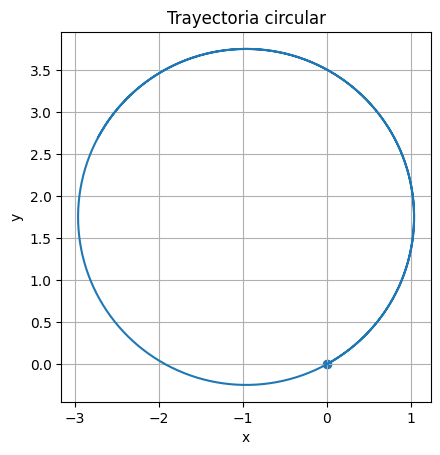

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 1.0
phi_dot0 = 2.0
theta_dot0 = 1.0
theta0 = 0.5
x0 = 0.0
y0 = 0.0

# Radio
R = a * phi_dot0 / theta_dot0

# Tiempo
t = np.linspace(0, 10, 1000)

# Ángulo
theta = theta_dot0 * t + theta0

# Trayectoria
x = x0 + R * (np.sin(theta) - np.sin(theta0))
y = y0 - R * (np.cos(theta) - np.cos(theta0))

# Gráfica
plt.figure()
plt.plot(x, y)
plt.scatter([x0], [y0])  # punto inicial
plt.gca().set_aspect('equal', 'box')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria circular")
plt.grid(True)
plt.show()
